In [42]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']
import matplotlib.pylab as plt
import numpy as np

# Optimization

Suppose we wish to find the minimum of the following function:

$$
f(x) = (x-3)^2 + 4
$$

As usual, a good place to start is by plotting it.

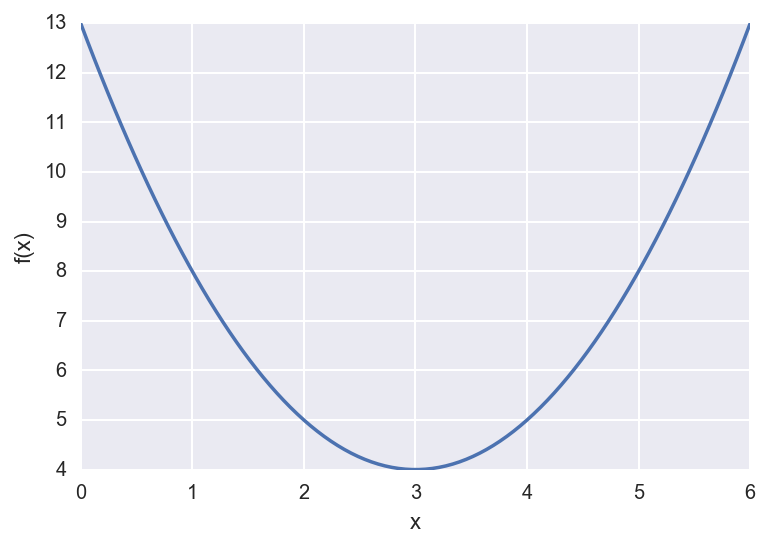

In [43]:
def f(x):
    return (x-3)**2 + 4

x = np.linspace(0,6,100)
y = f(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')

For this trivial example, we can see by inspection that the minimum occurs at $x=3$ and $f(x)=4$. Let's use `scipy.optimize.minimize()` to get the answer.

In [44]:
from scipy.optimize import minimize

In [47]:
x0 = 0. # Initial guess
res = minimize(f,x0)
print res

   status: 0
  success: True
     njev: 4
     nfev: 12
 hess_inv: array([[ 0.5]])
      fun: 4.0
        x: array([ 2.99999999])
  message: 'Optimization terminated successfully.'
      jac: array([ 0.])
      nit: 2


There are quite a few members of the objet `res`. 

**Question:** Which member corresponds to the location of the minimum? Which corresponds to the function at the minimum location?

The `minimize()` function is incredibly useful for a wide range of problems. Let's consider now a multi-dimensional problem:

$$
g(x,y) = (x-1)^2 + (y+1)^4 + 3
$$

**Question:** Before running the code, do you know the minimum to this function?

In [57]:
def g(invars):
    x = invars[0]
    y = invars[1]
    return (x-1)**2 + (y+1)**4 + 3

x0 = np.array([0.,0.])
#g(x0)
#x = x0[0]
#y = x0[1]
#print g(x0)
res = minimize(g,x0)
print res

   status: 0
  success: True
     njev: 14
     nfev: 56
 hess_inv: array([[  4.96252283e-01,   2.46142518e-04],
       [  2.46142518e-04,   3.33388489e+02]])
      fun: 3.0000000109504317
        x: array([ 1.        , -1.01022958])
  message: 'Optimization terminated successfully.'
      jac: array([  0.00000000e+00,  -4.29153442e-06])
      nit: 9


The `minimize()` function is using *iteration* to arrive at the answer. 

**Exercise: ** Modify the above code so that at each iteration it will print out the values of $x$, $y$, and $f(x)$. Generate a plot of $g(x,y)$ vs. iteration number.

In [126]:
def g(invars):
    x = invars[0]
    y = invars[1]
    
    qxy = (x-1)**2 + (y+1)**4 + 3
    
    #print qxy, x, y
    print qxy, ","
    return qxy 

    
x0 = np.array([0.,0.])
res = minimize(g, x0, tol=1-6)
print res 

5.0 ,
4.9999999702 ,
5.0000000596 ,
5.0 ,
85.0000128746 ,
85.0000128746 ,
85.0000129044 ,
85.0000112653 ,
3.19160726868 ,
3.19160726868 ,
3.19160725564 ,
3.19160726857 ,
3.21023759179 ,
3.21023759179 ,
3.21023760546 ,
3.21023759179 ,
3.000014007 ,
3.000014007 ,
3.000014007 ,
3.00001400699 ,
3.00001375645 ,
3.00001375645 ,
3.00001375645 ,
3.00001375644 ,
3.00001278791 ,
3.00001278791 ,
3.00001278791 ,
3.0000127879 ,
3.0000094192 ,
3.0000094192 ,
3.0000094192 ,
3.00000941919 ,
3.0000030449 ,
3.0000030449 ,
3.0000030449 ,
3.0000030449 ,
3.0000009903 ,
3.0000009903 ,
3.0000009903 ,
3.0000009903 ,
3.0000003215 ,
3.0000003215 ,
3.0000003215 ,
3.00000032149 ,
3.00000010427 ,
3.00000010427 ,
3.00000010427 ,
3.00000010427 ,
3.00000003389 ,
3.00000003389 ,
3.00000003389 ,
3.00000003389 ,
3.00000001095 ,
3.00000001095 ,
3.00000001095 ,
3.00000001095 ,
3.00000000356 ,
3.00000000356 ,
3.00000000356 ,
3.00000000356 ,
3.00000000116 ,
3.00000000116 ,
3.00000000116 ,
3.00000000116 ,
3.0000000004 ,
3.00

## Polyfit, pseudoinverse, optimization: Linking it all together


Suppose we wish to determine the polynomial which matches the following data:

In [79]:
x = np.array([1., 2.,   3.,    4.,   5.]) #
y = np.array([1., 3.8, 9.2,  15.5, 24.9])

We have already seen a way to determine the best fit order-2 polynomial using `polyfit`:

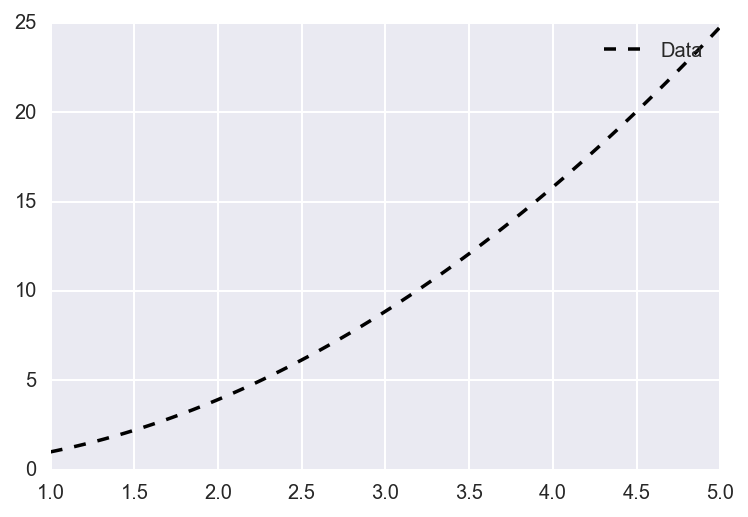

In [81]:
a = np.polyfit(x,y,2)

xfit = np.linspace(1.,5.,100)
yfit = a[0]*xfit**2 + a[1]*xfit + a[2]

#plt.plot(x,y,'s')
plt.plot(xfit,yfit,'k--')    # 'k--' gives us a black dashed line
plt.legend(["Data","Best fit"]) 


Let's talk about how polyfit really works.

We can think of the data as a system of equations of the form $y = a_2 x^2 + a_1 x + a_0$:
$$
1 = a_2 (1)^2 + a_1 (1) + a_0   \\
3.8 = a_2 (2)^2 + a_1 (2) + a_0 \\
9.2 = a_2 (3)^2 + a_1 (3) + a_0 \\
15.5 = a_2 (4)^2 + a_1 (4) + a_0 \\
24.9 = a_2 (5)^2 + a_1 (5) + a_0 \\
$$

In this system, we have 5 equations and 3 unknowns.

**Question:** What happens when we have more equations than unknowns? Think of the situations from yesterday.

Let's write this as a matrix equation.

<br>
<center>
 $ \begin{bmatrix}
1 & 1 & 1 \\
2^2 & 2 & 1 \\
3^2 & 3 & 1 \\
4^2 & 4 & 1 \\
5^2 & 5 & 1
\end{bmatrix} 
\begin{bmatrix}
a_2 \\ a_1 \\ a_0
\end{bmatrix}
=
\begin{bmatrix}
1 \\ 3.8 \\ 9.2 \\ 15.5 \\ 24.9
\end{bmatrix}
$
</center>

**Checkpoint:** Convince yourself that this matrix equation is equivalent to the system above.

This equation does not have an exact solution. Let's find the approximate solution using the pseudo-inverse.

In [88]:
yvec = np.matrix(y).T
#yvec = np.matrix([[1],
#                 [3.8],
#                 [9.2],
#                 [15.5],
#                 [24.9]])
A = np.matrix([[1,1,1], 
               [2.**2,2.,1.],
               [3.**2,3.,1.],
               [4.**2,4.,1.],
               [5.**2,5.,1.]
               ])
x = np.linalg.pinv(A)*yvec #pseudo inv used
print x

[[ 1.00714286]
 [-0.09285714]
 [ 0.08      ]]


**Question:** Verify that this is the same result we got from the `polyfit` function.

Let's see if we can go one level deeper. We mentioned yesterday that when we have more equations than unknowns, the pseudo-inverse will give us the *closest approximation* within the span of $A$ to the target vector $b$. Let's be a little more specific. Consider the vector:

$$
r = Ax - b
$$

We call this vector the **residual**. In order for the point $A x$ to be as close as possible to $b$, the length of this vector must be minimal. That is, the norm of the residual $||r||$ must be minimum.

**Exercise:** Write a function that accepts a value of the vector $x$ and returns the norm of the residual $||r||$. Use `minimize()` to find the value of $x$ that minimizes this function. Compare your result to the results from `polyfit` and `pinv` above. Can you get them to match?


*Hint:* The vector dot product $\vec{a} \cdot \vec{b}$ can be written in matrix notation as $a^T b$ where the superscript $T$ denotes the *matrix transpose*. 

In [136]:
#norm ||r|| = (r.r)^0.5 or (a sq+b sq)^.5

def resfunc(q):
   
   A = np.matrix([[1,1,1], 
              [2.**2,2.,1.],
              [3.**2,3.,1.],
              [4.**2,4.,1.],
              [5.**2,5.,1.]    
               ])
   b = np.matrix([1., 3.8, 9.2,  15.5, 24.9]).T
   q = np.matrix(q).T
   r = A*q-b

   return np.linalg.norm(r) # return the norm of vector r

q0=[0.,0.,0.]
output=minimize(resfunc,q0)
print output

   status: 0
  success: True
     njev: 17
     nfev: 85
 hess_inv: array([[ 0.03444201, -0.20615689,  0.24022507],
       [-0.20615689,  1.28335213, -1.58578521],
       [ 0.24022507, -1.58578521,  2.21727137]])
      fun: 0.4922252678270559
        x: array([ 1.00714251, -0.09285513,  0.07999772])
  message: 'Optimization terminated successfully.'
      jac: array([ -6.54533505e-06,  -1.58324838e-06,  -3.46451998e-07])
      nit: 11
